# DESAFIO III
# Clasificación de jugadores de la NBA según posición de juego
#### Grupo 5
1. Alexandra Binder
2. Andrés Montes
4. Verónica Nieves

---
## Introducción

El objetivo final a concretarse en el Desafío 3, es lograr clasificar en qué posición juega un jugador de la NBA. Para ello vamos a utilizar el dataset llamado `2021-2022 NBA Player Stats`, correspondiente a las estadísticas de jugadores de la NBA de la temporada regular 2021-2022 por partido. Los datos se encuentran disponibles en:

https://www.kaggle.com/vivovinco/nba-player-stats/version/1

**Las features del dataset son las siguientes:**

- Rk : Rank
- Player : Nombre
- **Pos : Posición**
- Age : Edad
- Tm : Equipo
- G : número de juegos
- GS : juegos comenzados
- MP : minutos jugados por juego
- FG : encestados por partido
- FGA : intentos de encesto por partido
- FG% : porcentaje de encesto por partido
- 3P : canastas de 3 puntos por partido
- 3PA : intentos de canastas de 3 puntos por partido
- 3P% : porcentaje de canastas de 3 puntos por partido
- 2P : canastas de 2 puntos por partido
- 2PA : intentos de canasta de 2 puntos por partido
- 2P% : porcentaje de canastas de 2 puntos por partido
- eFG% : porcentaje efectivo de canastas
- FT : tiros libres por juego
- FTA : intentos de tiros libres por juego
- FT% : porcentaje de tiros libres
- ORB : rebotes ofensivos por partido
- DRB : rebote defensivo por partido
- TRB : total de rebotes por juego
- AST : asistencias por partido
- STL : robos por juego
- BLK : bloques por juego
- TOV : perdidas del balón por partido
- PF : faltas personales por partido
- PTS : puntos por juego

Este dataset fue seleccionado por dos razones principales: Por un lado, contiene una feature categórica que ya viene relativamente balanceada (cada categoría contiene alrededor del 20% de los datos); por otro lado contiene varias features de tipo numérico que permiten a los modelos abstraer información de tipo variada para predecir la posición de un jugador.

El objetivo es aplicar los modelos de clasificación para el campo `posición` en donde tenemos las siguientes categorias: 
- **1 - PF:**	Point Forward
- **2 - SG:**	Shooting Guard
- **3 - SF:**	Small Forward
- **4 - PG:**	Power Forward
- **5 - C:**  Center
<br><br>
<img src="img/positions.png" alt="position-map" width="300"/>

### **Objetivos del Desafío 3**
- **Entrenar al menos tres modelos de clasificación distintos sobre estos datos**: De ser necesario aplicar una estrategia para balancear las categorías a clasificar. Normalizar los datos y aplicar regularización a los mismos. Aplicar GridSearch o RandomSearch para determinar los hiperparámetros óptimos de cada modelo. Van a utilizarse los siguientes modelos:
    - Naive Bayes (benchmark)
    - Regresión Logística
    - Modelo KNN
    
    
- **Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.**

- **Determinar la importancia de las features incluidas en la predicción. Intrepretar.**

---

<a id="indice"></a> 
## **Índice**

[Módulo 1 - Primer acercamiento](#modulo_01)

[Módulo 2 - Naive Bayes (benchmark)](#modulo_02)

[Módulo 3 - Modelos de clasificación](#modulo_03)

   [  * Modelo KNN](#modelo_KNN)
   
   [  * Regresión Logística](#modelo_RL)
   
   [  * Árboles de clasificación](#modelo_AC)
   

[Módulo 4 - Evaluación y comparación de modelos](#modulo_04)


[Conclusión](#modulo_05)

---

<a id="modulo_01"></a> 
## Módulo 1 - Primer acercamiento
[Ir a índice](#indice)

En esta primera sección vamos a explorar los datos y reducir el número de columnas, dejando solo aquellas que aportán información relevante para la clasificación.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2021-2022 NBA Player Stats V0.csv", sep=';', encoding='latin')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      590 non-null    int64  
 1   Player  590 non-null    object 
 2   Pos     590 non-null    object 
 3   Age     590 non-null    int64  
 4   Tm      590 non-null    object 
 5   G       590 non-null    int64  
 6   GS      590 non-null    int64  
 7   MP      590 non-null    float64
 8   FG      590 non-null    float64
 9   FGA     590 non-null    float64
 10  FG%     590 non-null    float64
 11  3P      590 non-null    float64
 12  3PA     590 non-null    float64
 13  3P%     590 non-null    float64
 14  2P      590 non-null    float64
 15  2PA     590 non-null    float64
 16  2P%     590 non-null    float64
 17  eFG%    590 non-null    float64
 18  FT      590 non-null    float64
 19  FTA     590 non-null    float64
 20  FT%     590 non-null    float64
 21  ORB     590 non-null    float64
 22  DR

Tenemos un total de 590 registros y 30 columnas, de las cuales 4 son de tipo **int**, 3 del tipo **object** y el resto son de tipo **float**. Dado que no hay registros nulos, no es necesario eliminar registros incompletos, o completarlos por métodos de imputación. 

---
### 1.1. Limpieza de datos anómalos

### 1.1.1. Features categóricas

Eliminamos las variables `Player`y `Tm` (team) ya que son features categóricas y no inciden en el trabajo de clasificación de posición de juego.

In [4]:
# quitamos la columna del "Player" y "Tm"
df.drop(columns=['Player', 'Tm'], inplace=True)

### 1.1.2. Target feature

Armamos una tabla que identifique las diferentes categorías en el feature de posiciones `Pos` y que contabilice la cantidad de registros pertenecientes a cada categoría y los porcentajes asociados a las mismas. Esto último se hace con el objetivo de definir si es necesario balancear o no las categorías para evitar desbalances en las estimaciones.

In [5]:
# resumen de posición "pos" 
df_pos = pd.DataFrame({'#': df['Pos'].value_counts().values})
df_pos.index = df['Pos'].value_counts().index
df_pos['%'] = [((x/df_pos['#'].sum())*100).round(2) for x in df_pos['#']]
print("Total amount of registers = ", df.shape[0])
df_pos

Total amount of registers =  590


,#,%
SG,145,24.58
SF,122,20.68
PG,110,18.64
PF,109,18.47
C,104,17.63


Se observa que contamos con un dataset con un `total de 590 registros` donde cada categoría target contiene aproximadamente el 20% de los datos. Como los datos se encuentran mas o menos balanceados, decidimos `mantener todos los datos` y `no balancear más las categorías`.

De haber rebajado cada categoría a 104 registros cada una para buscar balancear a la perfección los datos, se habría perdido más del 14% de los registros, lo cual no es conveniente.

### 1.1.3. Feature Rk

Los valores de ranking no pueden ser negativos y no deberían superar el valor de 590 debido a la cantidad de registros que tenemos

In [6]:
(df['Rk'] <= 0).value_counts()

False    590
Name: Rk, dtype: int64

In [7]:
(df['Rk'] > 590).value_counts()

False    590
Name: Rk, dtype: int64

### 1.1.4. Feature Age
Mientras está establecido que la edad mínima para jugar en la NBA es de 18 años; la edad máxima no se encuentra definida. Sin embargo los registros muestran que el jugador de mayor edad en retirarse de la NBA fue Nat Hickey con casi 46 años. (Según wikipedia)

In [8]:
(df['Age'] < 18).value_counts()

False    590
Name: Age, dtype: int64

In [9]:
(df['Age'] > 46).value_counts()

False    590
Name: Age, dtype: int64

### 1.1.5. Features restantes
Los features restantes presentan la característica que deben ser mayor o igual a cero, independientemente si son del tipo *int64* o *float64*

In [10]:
for col in df.columns:
    if df[col].dtypes != "object":
        val_c = (df[col] >= 0).value_counts()
        if not any(val_c.keys()):
            print(col)
            print(val_c)

En este caso todos los features cumplen con este requisito.

Los features pueden dividirse en dos categorías diferentes: aquellos con valores porcentuales y aquellos con valores de medias calculadas por partido. Como estos últimos no contienen más restricciones que aquellas mencionadas anteriormente, no es necesario seguir investigando; pero en el caso de los valores porcentuales, es necesario corroborar que estos no superen el valor de 1 o 100%.

In [11]:
perc_feat = [x for x in df.columns if '%' in x]
perc_feat

['FG%', '3P%', '2P%', 'eFG%', 'FT%']

In [12]:
for col in perc_feat:
        val_c = (df[col] > 1).value_counts()
        if any(val_c.keys()):
            print(col)
            print(val_c)

Los features cumplen con este requisito.

De esta manera damos por terminada la limpieza de datos de nuestro dataset en lo que respecta la búsqueda de datos anómalos.

---
### 1.2. Convertir en dummies las variables categóricas

Hacemos esto para poder graficar correctamente la matriz de correlación

In [13]:
print('Target feature unique values:')
print(df['Pos'].unique())
print("Original df size: ", df.shape)

Target feature unique values:
['C' 'PF' 'SG' 'PG' 'SF']
Original df size:  (590, 28)


In [14]:
dummies = pd.get_dummies(df['Pos'], prefix="Pos", drop_first=False)
df = pd.concat([df, dummies], axis=1)
print("New df size: ", df.shape)
df.columns

New df size:  (590, 33)


Index(['Rk', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C', 'Pos_PF',
       'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

Procedemos a guardar la versión a ser utilizada en los modelos.

In [15]:
# Generamos una nueva versión del dataset
df.to_csv("data_for_analyzing.csv", index=False)

---
<a id="sec_1.3"></a> 
### 1.3. Análisis exploratorio de los datos

In [176]:
df = pd.read_csv("data_for_analyzing.csv", index_col=False)

Buscamos analizar qué variables se encuentran más correlacionadas con cada una de las categorías:

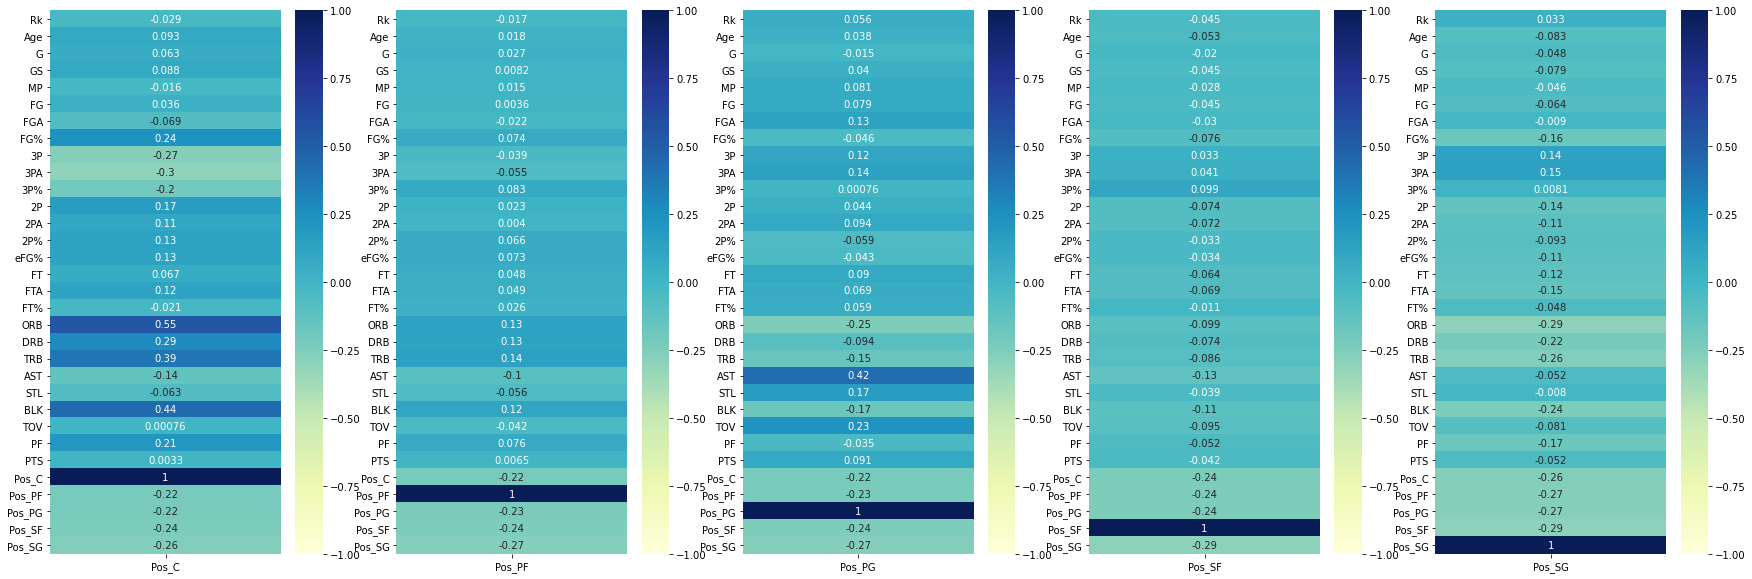

In [177]:
df_nopos = df.drop(columns="Pos")
pos_list = [x for x in df_nopos.columns if "Pos" in x]

fig, ax = plt.subplots(1, 5, figsize=(30,10))
i = 0
for pos in pos_list:
    sns.heatmap(df_nopos.corr()[[pos]], annot=True, vmin=-1, cmap="YlGnBu", square=False, ax=ax[i])
    i += 1

A partir de lo calculado podemos identificar las siguientes correlaciones (sin contemplar los target features):
- **Posición C:**
    - *más corr:* ORB, BLK, TRB, DRB, FG%
    - *menos corr:* 3PA, 3P, 3P%, AST


- **Posición PF:**
    - *más corr:* TRB, DRB, ORB, BLK
    - *menos corr:* AST


- **Posición PG:**
    - *más corr:* AST, TOV, STL, 3PA, FGA
    - *menos corr:* ORB, BLK, TRB


- **Posición SF:**
    - *más corr:* 3P%         
    - *menos corr:* AST, BLK


- **Posición SG:**
    - *más corr:* 3PA, 3P
    - *menos corr:* ORB, TRB, BLK, DRB, PF

Como trabajamos con varios features, para generar un pairplot legible es necesario seleccionar algunas features relevantes. Optamos por seleccionar aquellas features con mayor módulo de correlación con respecto a las categorias.

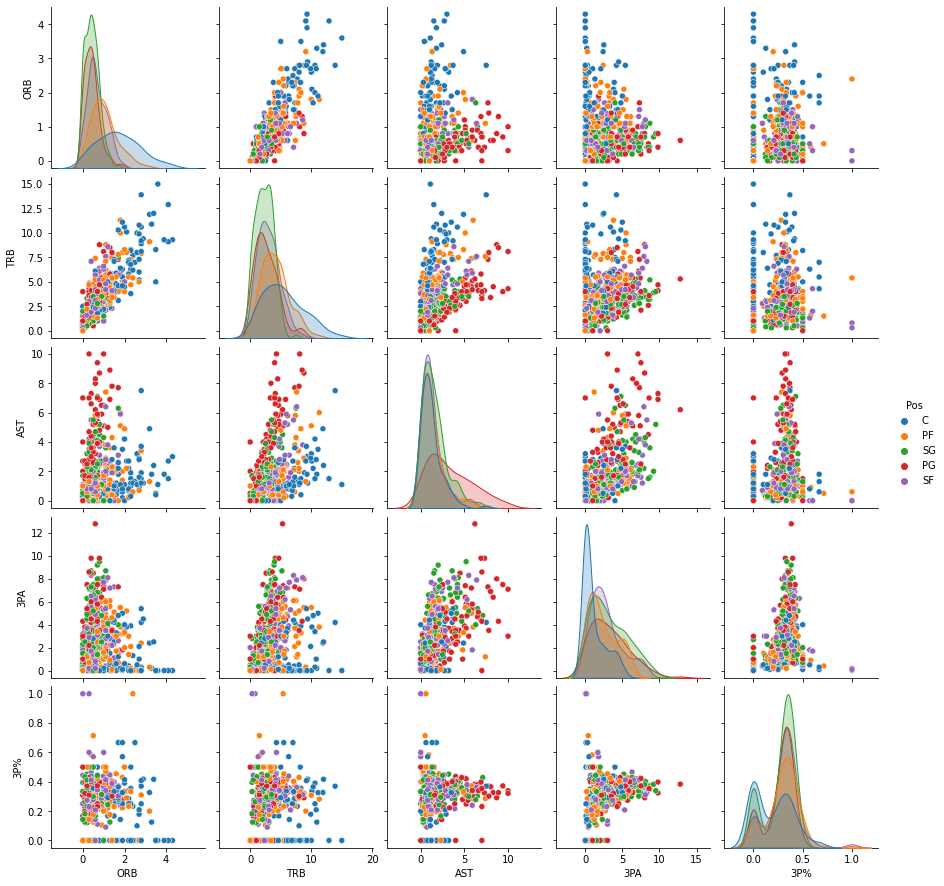

In [178]:
most_corr_feat = ["ORB", "TRB", "AST", "3PA", "3P%", "Pos"]
df_nodummies = df.drop(columns=pos_list)
df_pairplot = df_nodummies[most_corr_feat]
sns.pairplot(df_pairplot, hue="Pos")

Ahora podemos calcular y observar la correlación entre los features que no son target

<AxesSubplot:>

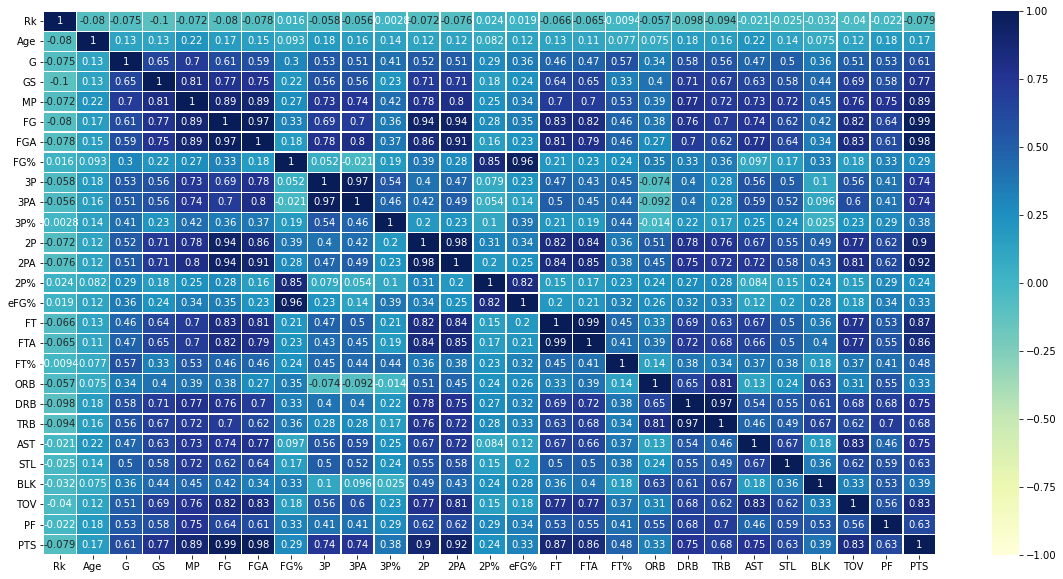

In [179]:
df_notarget = df.drop(columns=pos_list)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_notarget.corr(), annot=True, vmin=-1, cmap="YlGnBu", linewidths=.5, ax=ax)

Una vez finalizado el análisis exploratorio, eliminamos las columnas innecesarias y continuamos a la siguiente parte del trabajo donde generamos, entrenamos y evaluamos diferentes modelos de clasificación.


In [180]:
# Generamos una nueva versión del dataset
df_nodummies.to_csv("data_for_models.csv", index=False)

---
<a id="modulo_02"></a> 
## Módulo 2 - Benchmark
[Ir a índice](#indice)

En este módulo vamos a desarrollar le modelo de Naive Bayes que tomaremos como benchmark para evaluar y mejorar los modelos del siguiente módulo. <br><br> Antes de comenzar, vamos a definir tres combinaciones diferentes de features a utilizar en los modelos por lo generamos tres train_test_split acorde a cada uno de ellos. Estas variables van a ser llamadas a lo largo de la notebook.

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [216]:
data = pd.read_csv("data_for_models.csv")
data.head(2)

,Rk,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,C,22,34,20,25.3,3.4,8.1,0.412,0.3,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,C,28,44,43,25.7,2.6,4.9,0.521,0.0,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7


In [ ]:
# Definimos X a partir de la lista de features
X = data.drop(columns='Pos')
Y = data.Pos

# separamos train y test con proporción 70-30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 123)

features_1 = data.drop(columns='Pos').columns
features_2 = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', '3P', '2P', 'eFG%', 'FT', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
features_3 = ["ORB", "TRB", "AST", "3PA", "3P%"]

# Como Y es una única columna y los índices son iguales, no es necesario generar una variable aparte diferenciando features
X_train_1 = X_train[features_1]
X_test_1 = X_test[features_1]

X_train_2 = X_train[features_2]
X_test_2 = X_test[features_2]

X_train_3 = X_train[features_3]
X_test_3 = X_test[features_3]

# Generamos un dataframe donde vamos a contabilizar los resultados de cada modelo
resultados = pd.DataFrame(columns=['Accuracy', 'Confusion Matrix', 'Modelo'])

Utilizaremos validación cruzada para determinar que features nos ayudan a realizar mejores predicciones

A continuación vamos a evaluar distintos subconjuntos de features con el objetivo de identificar el conjunto que ayuda a generar mejores precicciones. Pero antes de eso, vamos a definir la función `cv_gnb` que recibe el subconjunto de features como una lista, genera X, Y, los conjuntos train y test, y posteriormente evalúa el modelo `gnb` utilizando validación cruzada con k_folds.

In [209]:
def cv_gnb (X_train, X_test, Y_train, Y_test, k_folds=10):
    
    # definimos la configuración para cross validation y lo aplicamos
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=12)
    cv_scores = cross_val_score(gnb, X_train, Y_train, cv=kf)
    
    # imprimimos la media, el mínimo y máximo de los scores
    print( "Media de cv_scores:\t{}%".format(round(cv_scores.mean()*100,2)))
    print( "Min de cv_scores:\t{}%".format(round(cv_scores.min()*100,2)))
    print( "Max de cv_scores:\t{}%".format(round(cv_scores.max()*100,2)))
    print('CV scores:\n', cv_scores)
    
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)

    # Generamos la matriz de confusion
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, xticklabels = Y.unique(), yticklabels = Y.unique(), linewidths=.5, cmap="YlGnBu")
    ax.set(xlabel='Prediction', ylabel='Ground truth', title="Confusion Matrix")

    acc = accuracy_score(Y_test, Y_pred)
    print("\nAccuracy = ", acc)
    print("\n")
    note = 'Naive Bayes con CV 10 fold todas las features'

    resultados.loc[len(resultados.index)] = [acc, conf_matrix, note]

Media de cv_scores:	37.53%
Min de cv_scores:	24.39%
Max de cv_scores:	46.34%
CV scores:
 [0.4047619  0.33333333 0.4047619  0.3902439  0.3902439  0.36585366
 0.46341463 0.41463415 0.24390244 0.34146341]

Accuracy =  0.3615819209039548




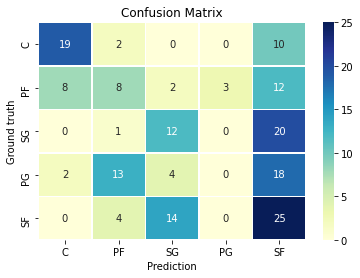

In [210]:
# COMBINACIÓN 1 - TODAS LAS FEATURES
cv_gnb(X_train_1, X_test_1, Y_train, Y_test)

Media de cv_scores:	36.8%
Min de cv_scores:	26.83%
Max de cv_scores:	48.78%
CV scores:
 [0.4047619  0.35714286 0.35714286 0.3902439  0.36585366 0.3902439
 0.48780488 0.3902439  0.26829268 0.26829268]

Accuracy =  0.3898305084745763




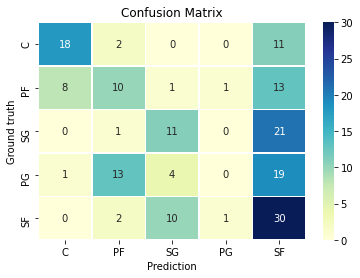

In [211]:
# COMBINACIÓN 2 - eliminando features con colinalidad (eliminamos intentos y valores porcentuales)
cv_gnb(X_train_2, X_test_2, Y_train, Y_test)

Media de cv_scores:	44.79%
Min de cv_scores:	26.83%
Max de cv_scores:	60.98%
CV scores:
 [0.5        0.45238095 0.4047619  0.48780488 0.51219512 0.46341463
 0.6097561  0.41463415 0.26829268 0.36585366]

Accuracy =  0.4011299435028249




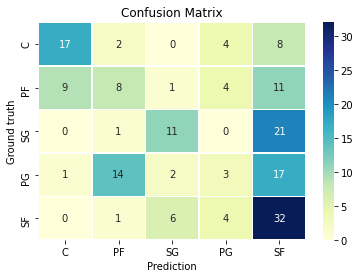

In [212]:
# COMBINACIÓN 3 - features de mayor correlación absoluta
cv_gnb(X_train_3, X_test_3, Y_train, Y_test)

<p style='color:red;'>MODIFICAR ESTO************************************************************************************************</p>

Podemos observar que para el modelo Naive Bayes Gaussiano, la combinación de features que obtuvo un mejor accuracy score fue la combinación 3 donde se utilizan las siguientes features: <br>["ORB", "TRB", "AST", "3PA", "3P%"]

Notemos que conseguimos un accuracy bastante bajo, de tan solo 36.16%. De la matriz de confusión se observa los siguiente:

  * `SF` es la categoría con mayor cantidad de predicciones correctas, pero también es la categoría con mayor peso _(columna 5)_, lo que genera un error de clasificación alto, ya que en gran parte de los registros se predice `SF` cuando la categoría real es otra. Por ejemplo, en 20 ocasiones se predijo la categoria `SF`cuando la verdadera categoría es `SG` (_ver celda (3,5)_). En otras palabras podemos decir que el modelo clasifica correctamente a SF pero no el resto de las categorías.
  
  
  * `PG` es la categoría con menor cantidad de predicciones _(columna 4)_. No existe ninguna predicción correcta para `PG` pese a que en el dataset original cada categoría representa al rededor del 20% de los datos. Es decir, el modelo no aprendió a clasificar correctamente a esta categoría.
  
  
  * La mayoría de las etiquetas predichas como `PG`realmente correponden a la categoría `PF`
  
  
  * La mayoría de las etiquetas predichas como `PF`realmente correponden a la categoría `PG`
  
  
  * La mayoría de las etiquetas predichas como `SG`realmente correponden a la categoría `SF`

---
<a id="modulo_03"></a> 
## Módulo 3 - Modelos de Clasificación
[Ir a índice](#indice)

[  * Modelo KNN](#modelo_KNN)

[  * Modelo de Regresión Logística](#modelo_LR)

[  * Modelo Árboles de clasificación](#modelo_AC)


En este módulo vamos a evaluar el performance de tres módelos de clasificación y lo vamos a comparar con el desempeño del modelo benchmark, el modelo Naive Bayes revisado previamente. En cada módelo se consideró lo siguiente:

* Aplicación del modelo base

* Busqueda de hiperparámetros optimos (GridSearch/RandomSearch)

La evaluación de los modelos se revisará en el siguiente módulo.

---
<a id="modelo_KNN"></a> 
#### Modelo KNN
[Ir al inicio del módulo 3](#modulo_03)

Recordemos que estamos trabajando con un problema de clasificación multicase, con cinco categorias (**n=5**) que se refieren a las posiciones de los jugadores (**C**, **PF**, **SG**, **PG**, **SF**). En este problema las etiquetas son mutuamente excluyentes, es decir, que a cada registro se le puede asignar una y solo una de estas etiquetas. 

A continuación vamos a evaluar el mismo modelo usando cross validation, pero primero vamos a estandarizar la matriz de features para eliminar sus disntintas unidades de medida y evitar distorciones debidas a diversas escalas. Esto es importante ya que KNN es un método que se basa en calcular distancias. 

Para poder definir cuál es la cantidad óptima de vecinos y cuál es el mejor método de cálculo de distancia, vamos a utilizar GridSearch. De esta manera logramos calcular todas las combinaciones posibles para luego analizar la más óptima.

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [219]:
scaler = StandardScaler()

X_train_1_std = scaler.fit_transform(X_train_1)
X_train_2_std = scaler.fit_transform(X_train_2)
X_train_3_std = scaler.fit_transform(X_train_3)

Y_train_std = scaler.transform(Y_train)

<p style='color: red;'> ************AGREGAR GRID SEARCH**************</p>
<p style='color: red;'> Recordatorio k= cantidad de vecinos, no cantidad de clusters :D</p>

El mejor score se obtiene en: 


,score_medio,score_std,k_neighbors,limite_inferior,limite_superior
8,0.501352,0.052649,9,0.448703,0.554001


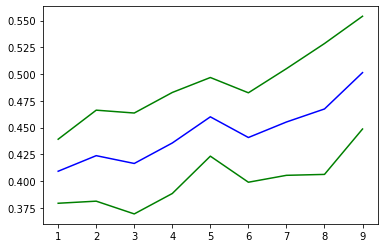

In [89]:

# Calculamos los scores de cross validation usando las features estandarizadas
kf = KFold(n_splits=5, shuffle=True, random_state=123)
standard_scores = []
for k in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'k_neighbors':k}
    standard_scores.append(dict_row_score)

    
# Creamos el df a partir del diccionario y calculamos limite_inferiory limite superior
df_standard_scores = pd.DataFrame(standard_scores)
df_standard_scores['limite_inferior'] = df_standard_scores['score_medio'] - df_standard_scores['score_std']
df_standard_scores['limite_superior'] = df_standard_scores['score_medio'] + df_standard_scores['score_std']

# Graficamos los resultados
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['limite_inferior'], color='g')
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['score_medio'], color='b')
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['limite_superior'], color='g');

# Identificamos el mejor score
print("El mejor score se obtiene en: ")
df_standard_scores.loc[df_standard_scores.score_medio == df_standard_scores.score_medio.max()]



De la gráfica anterior podemos notar que la media del score presenta una tencia de crcieminto, de manera que, al aumentar k, se consigue un mejor score, sin embargo, notemos que existe un "pico" cuando k=5, donde $score_medio = 50.13$%. En este problema, el parametro k lo tenemos bien definido por la naturaleza deldataset como k=5. 

Antes de enforcanos enteramente al modelo con k=5 y usando cross validation, veamos que sucede cuando evaluamos distintos valores de k, pero considerando la combinación de mejor accuracy en en modelo Naive Bayes. 

El mejor score se obtiene en: 


,score_medio,score_std,k_neighbors,limite_inferior,limite_superior
8,0.498942,0.055344,9,0.443598,0.554286


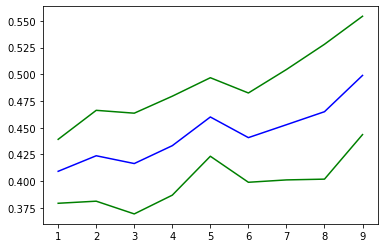

In [93]:
# COMBINACIÓN 4 - features de mayor correlación
features_04 = ["ORB", "TRB", "AST", "3PA", "3P%"]

# Separamos el dataset en la matriz de features X y el vector target Y
X = data[features_04]
Y = data["Pos"]

# Definimos los conjuntos Train y Test con proporción 70-30 y usando estratificación
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=123)

# Estandarizamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Calculamos los scores de cross validation usando las features estandarizadas
kf = KFold(n_splits=5, shuffle=True, random_state=123)
standard_scores = []
for k in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'k_neighbors':k}
    standard_scores.append(dict_row_score)
    
# Creamos el df a partir del diccionario y calculamos limite_inferiory limite superior
df_standard_scores = pd.DataFrame(standard_scores)
df_standard_scores['limite_inferior'] = df_standard_scores['score_medio'] - df_standard_scores['score_std']
df_standard_scores['limite_superior'] = df_standard_scores['score_medio'] + df_standard_scores['score_std']

# Graficamos los resultados
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['limite_inferior'], color='g')
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['score_medio'], color='b')
plt.plot(df_standard_scores['k_neighbors'], df_standard_scores['limite_superior'], color='g');

# Identificamos el mejor score
print("El mejor score se obtiene en: ")
df_standard_scores.loc[df_standard_scores.score_medio == df_standard_scores.score_medio.max()]
#df_standard_scores


La tendencia del `score_medio` cuando usamos la **COMBINACIÓN_4** de features es similar a la obtenida cuando se evalua el conjunto total de features del dataset. Nuevamente encontramos tendencia de crecimiento a medida que el parametro `n_neighbors`  aumenta. Y encontramos un "pico" en k=5. Sin embargo, el score_medio para $k=5$ es $49.89 $%, que es menor al score obtenido cuando se consideran todas las features ($ 50.13$%.). 

Ahora, vamos a evaluar el modelo aplicando cross validation, k=5 y tomando matriz de features completa.

In [ ]:
# REVISAR - VERO

# Separamos el dataset en la matriz de features X y el vector target Y
X = data.drop(columns="Pos")
Y = data["Pos"]

# Definimos los conjuntos Train y Test con proporción 70-30 y usando estratificación
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=123)

model = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(model, X_train, Y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'k_neighbors':k}


# Instanciamos el modelo con k=5,
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustamos el modelo y predecimos etiquetas para X_test
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
# print(y_pred)


# Generamos la matriz de confusion
conf_matrix = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(conf_matrix, annot=True, xticklabels = Y.unique(), yticklabels = Y.unique(), linewidths=.5, cmap="YlGnBu")
ax.set(xlabel='Prediction', ylabel='Ground truth', title="Confusion Matrix")

# Calculamos el accuracy
acc = round(accuracy_score(Y_test, Y_pred)*100,2)
print("Accuracy: {}%".format(acc))

---
<a id="modelo_LR"></a> 
#### Modelo de Regresión Logística
[Ir al inicio del módulo 3](#modulo_03)

<p 

---
<a id="modelo_AC"></a> 
#### Modelo Árboles de Clasificación
[Ir al inicio del módulo 3](#modulo_03)

---
<a id="modulo_04"></a> 
## Módulo 4 - Comparación de modelos
[Ir a índice](#indice)

sacado de naive bayes

Evaluamos distintas combinaciones de features, de las cuales, **COMBINACIÓN 4**, definida por la features de mayor módulo de correlación con la variable target [(ver sección 1.3)](#sec_1.3), es una de las mejores combinaciones ya que la media del score es $43.03$%, en comparación con el modelo benchmark donde el score fue del $36.16$%. Por otro lado, la **COMBINACIÓN 5** que consisten unicamente en la variable `ORB` también muestra un desempeño bastante bueno, con un score promedio de $37.23$%. Este score es menor que el de la  COMBINACIÓN 5, pero el rango de los scores obtenido con kf=10 varia considerablemente, especialmente en el límite inferior, donde resulta aproximadamente 10% arriba del valor mínimo en la  COMBINACIÓN 4.

Veamos como se modifica la matriz de confusión al considerar estas combinaciones de features:


In [ ]:
# Definimos X y Y
col_features = features_04 #Combinación 4
X = data[col_features]; Y = data.Pos

# Separamos train y test con proporción 70-30 y stratifyy Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state = 123)

# Ajustamos y predecimos
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

# Calculamos el accuracy
acc = round(accuracy_score(Y_test, Y_pred)*100,2)
print("Acuracy: {}%".format(acc))

# Generamos la matriz de confusion
conf_matrix_new = confusion_matrix(Y_test, Y_pred)

# Comparamos las matrices de confusión

# REVISAR - agregar la matriz de confusión inicial.
fig, ax = plt.subplots(1, 2, figsize=(30,13))
sns.heatmap(conf_matrix, annot=True, xticklabels = Y.unique(), yticklabels = Y.unique(), linewidths=.5, cmap="YlGnBu", ax=ax[0])
ax[0].set(xlabel='Prediction', ylabel='Ground truth', title="Initial Confusion Matrix")

sns.heatmap(conf_matrix_new, annot=True, xticklabels = Y.unique(), yticklabels = Y.unique(), linewidths=.5, cmap="YlGnBu", ax=ax[1])
ax[1].set(xlabel='Prediction', ylabel='Ground truth', title="New Confusion Matrix");

Notemos como cambian las dos matrices de confusión, principalmente se observa lo siguiente:

* El número de predicciones en `PG` incrmentó, pero solo el 20% de ellas son correctas _(columna 4, celda (4,4))_
* El número de precicciones correctas de `SG` mejoró, y el error de clasificación de `SG`(predicción) en `SF`(realidad) disminuyó.

En esta ejecución del modelo obtuvimos un mejor accuracy: $40.11$%

---
<a id="modulo_05"></a> 
## Conclusión 
[Ir a índice](#indice)